### Association
Investigation of association or regression coefficients for one variable at different lags and aggregations. Use of quick and dirty saves for sst-atlantic and z300-europe

In [21]:
import xarray as xr
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from pathlib import Path

In [103]:
#BASEDIR = Path('/scistor/ivm/jsn295/reversed/spatcov') #reversed/spatcov2
BASEDIR = Path('/scistor/ivm/jsn295/spatcov') 
response = xr.open_dataarray(BASEDIR / 'response.3.nc')
ssts = xr.open_dataarray(BASEDIR / 'z300_nhmin.europe.spatcov.nc')
#ssts = xr.open_dataarray(BASEDIR / 'sst_nhplus.natlantic.spatcov.nc')

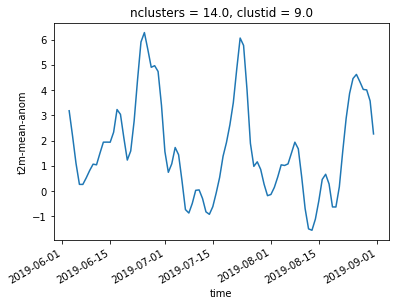

In [25]:
response[-90:].plot()

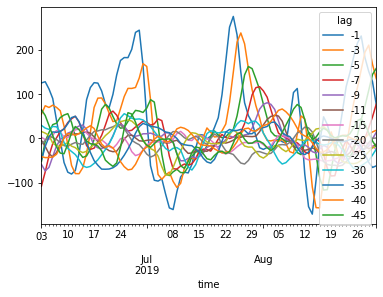

In [104]:
ssts[1,:,-90:].T.to_pandas().plot() # One timeagg, currently lower lag means higher variability (except for daily)

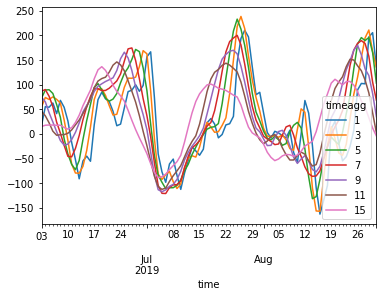

In [105]:
ssts[:,1,-90:].T.to_pandas().plot()

One lag, multiple timeaggs. The signal displacement is a consequence of the left stamping. Currently lag 1 is one day into the future. Timeagg 15 is then aggregation of day 1 to 15. It contains the peak values before others contain them.

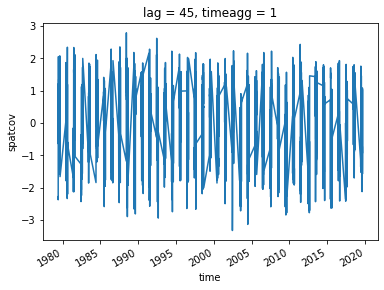

In [80]:
ssts[0,-1,:].plot()

In the long term, no one clear monotonic trend seems to play a large role in the spatial covariance timeseries. This of course in contrast to the response timeseries. However, the pattern is formed by correlation on detrended data. Is it okay to not detrend per grid. Not if it is uniform, as it is not the absolute correspondence that is quantified but the pattern similarity.

In [106]:
corrs = np.corrcoef(ssts.stack({'stacked':['lag','timeagg']}).T)

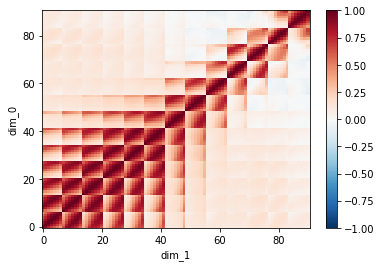

In [107]:
xr.DataArray(corrs).plot()

The correlations between all these datapairs shows that lag 1 is quite distinct from the others. This might mean that the spatial pattern is very different. . And then there is a block up to lag 15 or so with high cross correlations at all timeaggs, and then a more seperate block beyond 15/20. Within one lag square you see a fairly symmetric pattern.

In [117]:
test = ssts.stack({'stacked':['lag','timeagg']}).coords['stacked'].values
print(test)

[(-1, 1) (-1, 3) (-1, 5) (-1, 7) (-1, 9) (-1, 11) (-1, 15) (-3, 1) (-3, 3)
 (-3, 5) (-3, 7) (-3, 9) (-3, 11) (-3, 15) (-5, 1) (-5, 3) (-5, 5) (-5, 7)
 (-5, 9) (-5, 11) (-5, 15) (-7, 1) (-7, 3) (-7, 5) (-7, 7) (-7, 9)
 (-7, 11) (-7, 15) (-9, 1) (-9, 3) (-9, 5) (-9, 7) (-9, 9) (-9, 11)
 (-9, 15) (-11, 1) (-11, 3) (-11, 5) (-11, 7) (-11, 9) (-11, 11) (-11, 15)
 (-15, 1) (-15, 3) (-15, 5) (-15, 7) (-15, 9) (-15, 11) (-15, 15) (-20, 1)
 (-20, 3) (-20, 5) (-20, 7) (-20, 9) (-20, 11) (-20, 15) (-25, 1) (-25, 3)
 (-25, 5) (-25, 7) (-25, 9) (-25, 11) (-25, 15) (-30, 1) (-30, 3) (-30, 5)
 (-30, 7) (-30, 9) (-30, 11) (-30, 15) (-35, 1) (-35, 3) (-35, 5) (-35, 7)
 (-35, 9) (-35, 11) (-35, 15) (-40, 1) (-40, 3) (-40, 5) (-40, 7) (-40, 9)
 (-40, 11) (-40, 15) (-45, 1) (-45, 3) (-45, 5) (-45, 7) (-45, 9)
 (-45, 11) (-45, 15)]


[(-45, 1) (-40, 1) (-35, 1) (-30, 1) (-25, 1) (-20, 1) (-15, 1) (-11, 1)
 (-9, 1) (-7, 1) (-5, 1) (-3, 1) (-1, 1) (-45, 3) (-40, 3) (-35, 3)
 (-30, 3) (-25, 3) (-20, 3) (-15, 3) (-11, 3) (-9, 3) (-7, 3) (-5, 3)
 (-3, 3) (-1, 3) (-45, 5) (-40, 5) (-35, 5) (-30, 5) (-25, 5) (-20, 5)
 (-15, 5) (-11, 5) (-9, 5) (-7, 5) (-5, 5) (-3, 5) (-1, 5) (-45, 7)
 (-40, 7) (-35, 7) (-30, 7) (-25, 7) (-20, 7) (-15, 7) (-11, 7) (-9, 7)
 (-7, 7) (-5, 7) (-3, 7) (-1, 7) (-45, 9) (-40, 9) (-35, 9) (-30, 9)
 (-25, 9) (-20, 9) (-15, 9) (-11, 9) (-9, 9) (-7, 9) (-5, 9) (-3, 9)
 (-1, 9) (-45, 11) (-40, 11) (-35, 11) (-30, 11) (-25, 11) (-20, 11)
 (-15, 11) (-11, 11) (-9, 11) (-7, 11) (-5, 11) (-3, 11) (-1, 11)
 (-45, 15) (-40, 15) (-35, 15) (-30, 15) (-25, 15) (-20, 15) (-15, 15)
 (-11, 15) (-9, 15) (-7, 15) (-5, 15) (-3, 15) (-1, 15)]


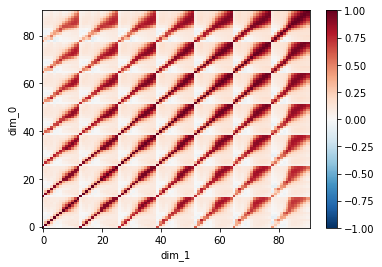

In [130]:
sort_indices = np.lexsort(np.array(test.tolist()).T) # Sorted by time aggregation
print(test[sort_indices])
#xr.DataArray(corrs[sort_indices,:][:,sort_indices], dims = ['dim0','dim1'], coords = {'dim0':test, 'dim1':test}).plot()
xr.DataArray(corrs[sort_indices,:][:,sort_indices]).plot()

In [100]:
grouped = ssts.stack({'stacked':['lag','timeagg']}).groupby('stacked')

In [101]:
corr_to_response = grouped.apply(lambda x: xr.DataArray(np.corrcoef(x.values.squeeze(), y = response.values)[0,1], name = 'pearson'))

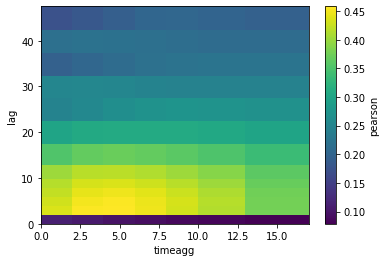

In [102]:
corr_to_response.unstack('stacked').plot()

In [45]:
corr_to_response

<xarray.DataArray 'pearson' (stacked: 91)>
array([0.09310928, 0.10719991, 0.11021779, 0.10806455, 0.1090106 ,
       0.10600666, 0.09459753, 0.11769798, 0.14383813, 0.16246095,
       0.158338  , 0.14999631, 0.13795892, 0.10569422, 0.10677711,
       0.12241073, 0.13146106, 0.13278331, 0.1290836 , 0.1204975 ,
       0.09046113, 0.10420958, 0.09731908, 0.09085499, 0.09194497,
       0.09220352, 0.09206191, 0.0929049 , 0.09903125, 0.11791498,
       0.13391534, 0.13821075, 0.13429402, 0.13166387, 0.12906253,
       0.12406938, 0.13294172, 0.13732375, 0.14248398, 0.14592528,
       0.14604613, 0.16007245, 0.12738508, 0.13461934, 0.13698812,
       0.14325784, 0.16182094, 0.19634291, 0.34210614, 0.13872428,
       0.16833233, 0.20522901, 0.25506376, 0.32877165, 0.42975856,
       0.57458274, 0.1818206 , 0.23059624, 0.29277788, 0.37521677,
       0.48536396, 0.58611762, 0.63113109, 0.25701369, 0.32621111,
       0.41816434, 0.54200472, 0.65073718, 0.68731886, 0.64743027,
       0.36428478, 0.46415964, 0.60382164, 0.71897527, 0.74421275,
       0.71747948, 0.62826551, 0.5209311 , 0.67922193, 0.79545647,
       0.79957267, 0.74993012, 0.69027058, 0.57527486, 0.7589151 ,
       0.86442165, 0.8339253 , 0.75253931, 0.67228885, 0.59911286,
       0.48212884])
Coordinates:
  * stacked          (stacked) MultiIndex
  - stacked_level_0  (stacked) int64 -45 -45 -45 -45 -45 -45 ... -1 -1 -1 -1 -1
  - stacked_level_1  (stacked) int64 1 3 5 7 9 11 15 1 3 ... 15 1 3 5 7 9 11 15